In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\hi\Documents\Python Scripts\auto_clean.csv")
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


<AxesSubplot:>

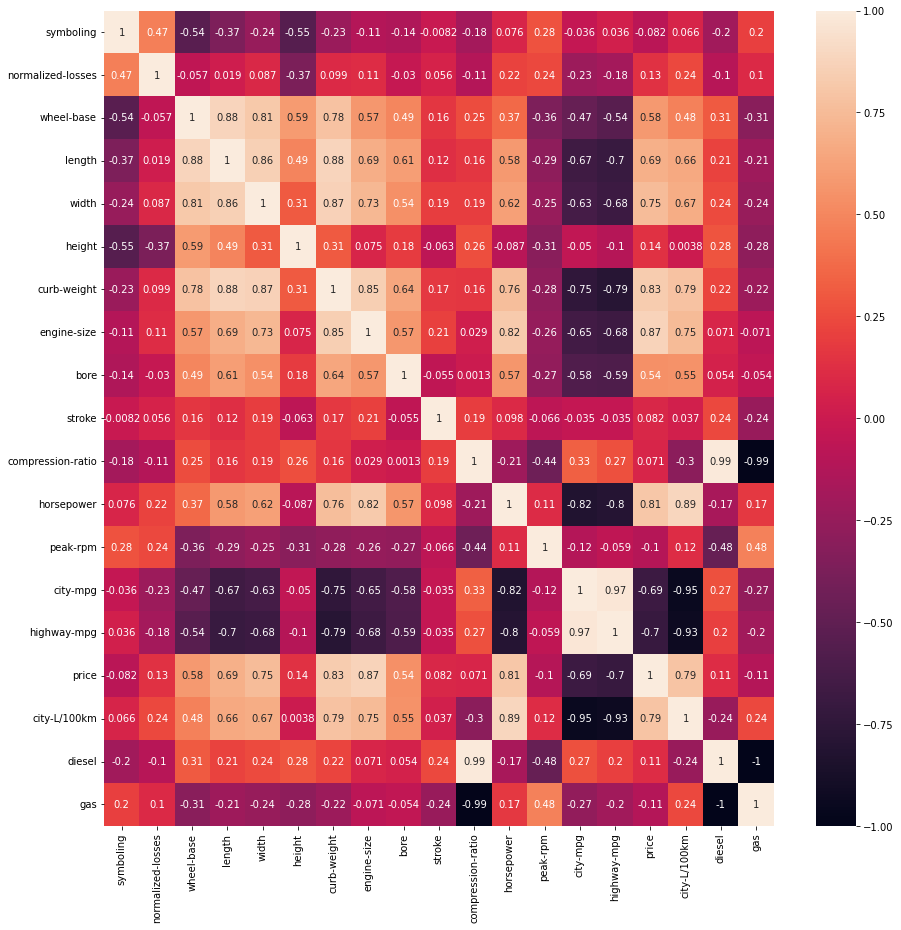

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df1=df.select_dtypes(exclude="object")
plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(),xticklabels=df1.columns,yticklabels=df1.columns,annot=True)# To find the variables to form clusters on
#The first default attribute is price since that is the prime attribute when considering to buy cars
#In relation to price, citympg,highwaympg and peak rpm are negatively related but we seklect highway mpg since it has the highest negative correlataion

In [43]:
# Finding the optimal no of clusters
df2=df[["make","highway-mpg","price"]]
X=df[["highway-mpg","price"]]
Y=df2.iloc[:,[0]]
Y



,make
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
196,volvo
197,volvo
198,volvo
199,volvo


In [26]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit(X)
X_s=pd.DataFrame(s.transform(X),columns=X.columns)
X_s

,highway-mpg,price
0,-0.542288,0.036314
1,-0.542288,0.415385
2,-0.689386,0.415385
3,-0.100993,0.093711
4,-1.277779,0.535224
...,...,...
196,-0.395189,0.458906
197,-0.836484,0.736429
198,-1.130681,1.044227
199,-0.542288,1.168481


C:\Users\hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


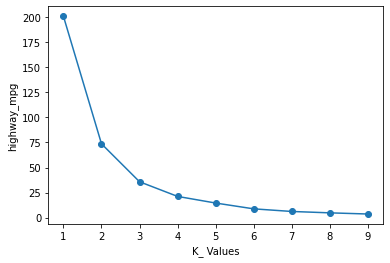

In [29]:
# Finding Elbow point
from sklearn.cluster import KMeans
s1=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(X_s[["highway-mpg"]])
    s1.append(km.inertia_)
plt.xlabel('K_ Values')
plt.ylabel("highway_mpg")
plt.plot(range(1,10),s1,marker='o')

# Value is 3 for highway-mpg    
    
    

C:\Users\hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


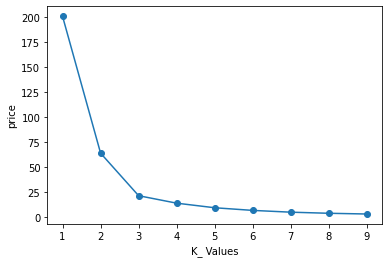

In [30]:
s2=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(X_s[["price"]])
    s2.append(km.inertia_)
plt.xlabel('K_ Values')
plt.ylabel("price")
plt.plot(range(1,10),s2,marker='o')
# Elbow point is at 3 for price too.Therefore optimal no of clusters is 3

# Implementation of clustering

In [60]:
km1=KMeans(n_clusters=3)
km1.fit(X_s[["price"]])
y_predict=km1.predict(X_s[["price"]])
df_price=pd.concat([X_s["price"],Y["make"]],axis=1)
df_price["Clusters1"]=y_predict
df_price
                      

,price,make,Clusters1
0,0.036314,alfa-romero,2
1,0.415385,alfa-romero,2
2,0.415385,alfa-romero,2
3,0.093711,audi,2
4,0.535224,audi,2
...,...,...,...
196,0.458906,volvo,2
197,0.736429,volvo,2
198,1.044227,volvo,2
199,1.168481,volvo,2


Text(0, 0.5, 'Car_Name')

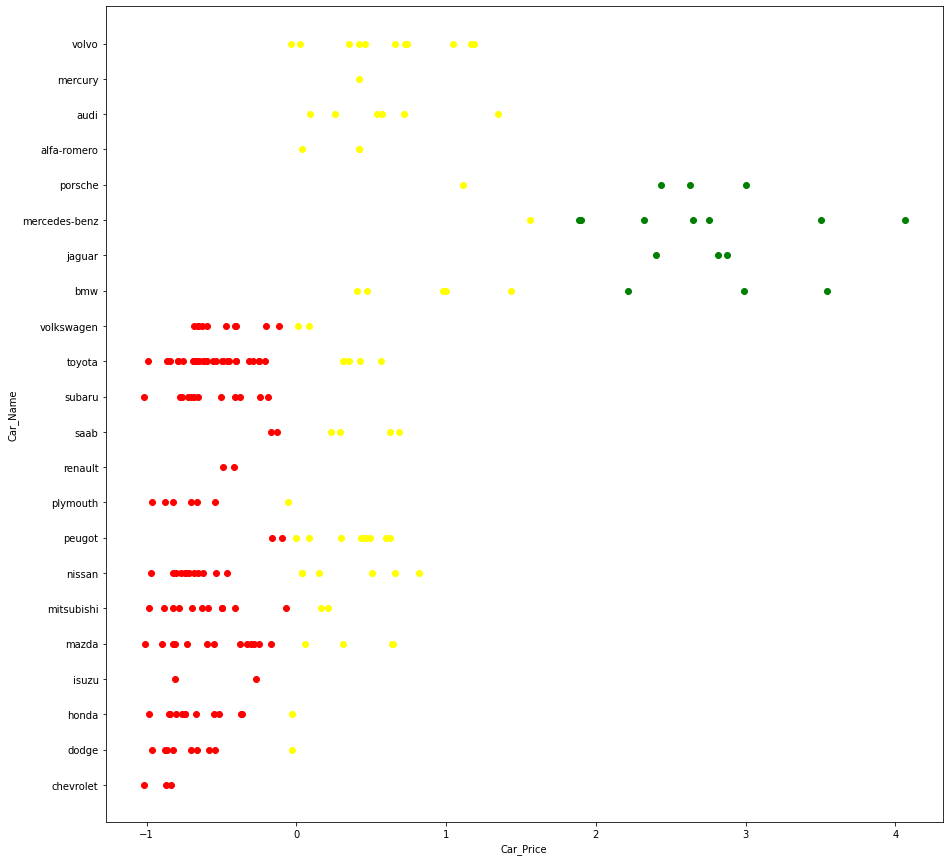

In [67]:
df_price0=df_price[df_price["Clusters1"]==0]
df_price1=df_price[df_price["Clusters1"]==1]
df_price2=df_price[df_price["Clusters1"]==2]
plt.figure(figsize=(15,15))
plt.scatter(df_price0["price"],df_price0["make"],color='red')
plt.scatter(df_price1["price"],df_price1["make"],color='green')
plt.scatter(df_price2["price"],df_price2["make"],color='yellow')
plt.xlabel("Car_Price")
plt.ylabel("Car_Name")

In [ ]:
# We can clearly see that cars in the red cluster have low price wheareas cars in the green cluster have high price

In [59]:
km1=KMeans(n_clusters=3)
km1.fit(X_s[["highway-mpg"]])
y_predict=km1.predict(X_s[["highway-mpg"]])
df_highway=pd.concat([X_s["highway-mpg"],Y["make"]],axis=1)
df_highway["Clusters2"]=y_predict
df_highway
             

,highway-mpg,make,Clusters2
0,-0.542288,alfa-romero,0
1,-0.542288,alfa-romero,0
2,-0.689386,alfa-romero,0
3,-0.100993,audi,2
4,-1.277779,audi,0
...,...,...,...
196,-0.395189,volvo,2
197,-0.836484,volvo,0
198,-1.130681,volvo,0
199,-0.542288,volvo,0


Text(0, 0.5, 'Car_Name')

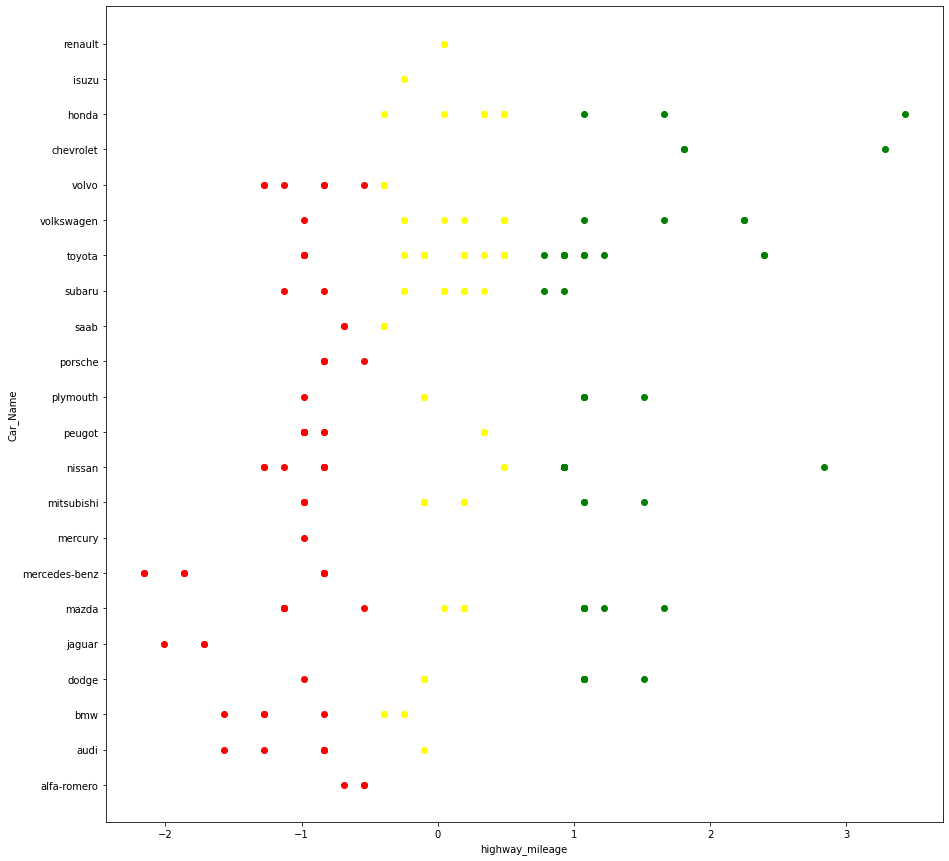

In [66]:
df_highway0=df_highway[df_highway["Clusters2"]==0]
df_highway1=df_highway[df_highway["Clusters2"]==1]
df_highway2=df_highway[df_highway["Clusters2"]==2]
plt.figure(figsize=(15,15))
plt.scatter(df_highway0["highway-mpg"],df_highway0["make"],color='red')
plt.scatter(df_highway1["highway-mpg"],df_highway1["make"],color='green')
plt.scatter(df_highway2["highway-mpg"],df_highway2["make"],color='yellow')
plt.xlabel("highway_mileage")
plt.ylabel("Car_Name")

In [ ]:
# We can clearly see from the graph that cars in the green cluster have high highway mileage wheras cars in the yellow cluster 
# have average mileage and cars in the red cluster have low mileage